## Entering FourSquare Credentials and importing libraries

In [1]:
CLIENT_ID = 'AUBPCE131J4KTS2N04BDXUDJVCDXCW3R2CSXRSH4VVH1VT14' # your Foursquare ID
CLIENT_SECRET = 'AKKDCLL1QI3UFLPBEFPYS3YN14YERLQYKQSONTJ5KSMTIUUL' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

Your credentails:
CLIENT_ID: AUBPCE131J4KTS2N04BDXUDJVCDXCW3R2CSXRSH4VVH1VT14
CLIENT_SECRET:AKKDCLL1QI3UFLPBEFPYS3YN14YERLQYKQSONTJ5KSMTIUUL


## Getting Postal Codes of Mysore region with Latitude and Longitude

In [2]:
postalCodeWithLocation = pd.read_csv(r"C:\Users\ASarkar\Desktop\CPS_1A\PO_Location.csv");
postalCodeWithLocation.shape

(154797, 15)

In [3]:
postalCodeWithLocation.drop(postalCodeWithLocation.loc[postalCodeWithLocation['regionname']!='South Karnataka'].index, inplace=True)
postalCodeWithLocation.shape

(4594, 15)

In [4]:
postalCodeWithLocation.dropna(subset = ['longitude','latitude'], inplace=True)
postalCodeWithLocation.shape

(82, 15)

In [5]:
cleanPOandLL=postalCodeWithLocation[['officename','pincode','longitude','latitude']]
cleanPOandLL.shape

# drop duplicates
cleanPOandLL.drop_duplicates(subset='pincode', keep="first",inplace=True)
cleanPOandLL.shape


C:\Users\ASarkar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


(66, 4)

## Retrieve venues using FourSquare API

In [6]:
def getNearbyVenues(names, latitudes, longitudes, radius=50,LIMIT = 100 ):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&intent=browse&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['id'],
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name'] if len(v['categories']) else '',
            v['categories'][0]['icon']['prefix'] if len(v['categories']) else '',
        ) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                   'Venue ID',          
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue Icon' ]
    
    return(nearby_venues)

In [7]:
venuesFromFoursquare = getNearbyVenues(names=cleanPOandLL['pincode'],
                                   latitudes=cleanPOandLL['latitude'],
                                   longitudes=cleanPOandLL['longitude'])

571430
571401
570028
570015
570018
571102
571103
570026
570020
571104
570004
571617
570025
571610
570002
571125
571601
571106
570016
571114
571105
570027
570010
570012
570014
571116
571311
571187
571134
571602
570001
570023
570006
571603
570005
570008
570007
570003
571107
570022
571189
571108
571604
570009
571121
570029
570011
570019
570017
571130
571101
571110
571111
571127
571314
571315
571117
571118
571312
571129
571301
571120
571124
571119
571122
571302


In [8]:
#filter where Category not defined

filter = venuesFromFoursquare["Venue Category"] != ""
venuesFromFoursquareValid = venuesFromFoursquare[filter]
venuesFromFoursquareValid.shape

(3685, 9)

In [9]:
#Filter only food related Categories

venuesFromFoursquareValidFood=venuesFromFoursquareValid[venuesFromFoursquareValid['Venue Icon'].str.contains("food")]
venuesFromFoursquareValidFood.shape

(991, 9)

##### Identify Top 9 Food Categories to describe Postal Code

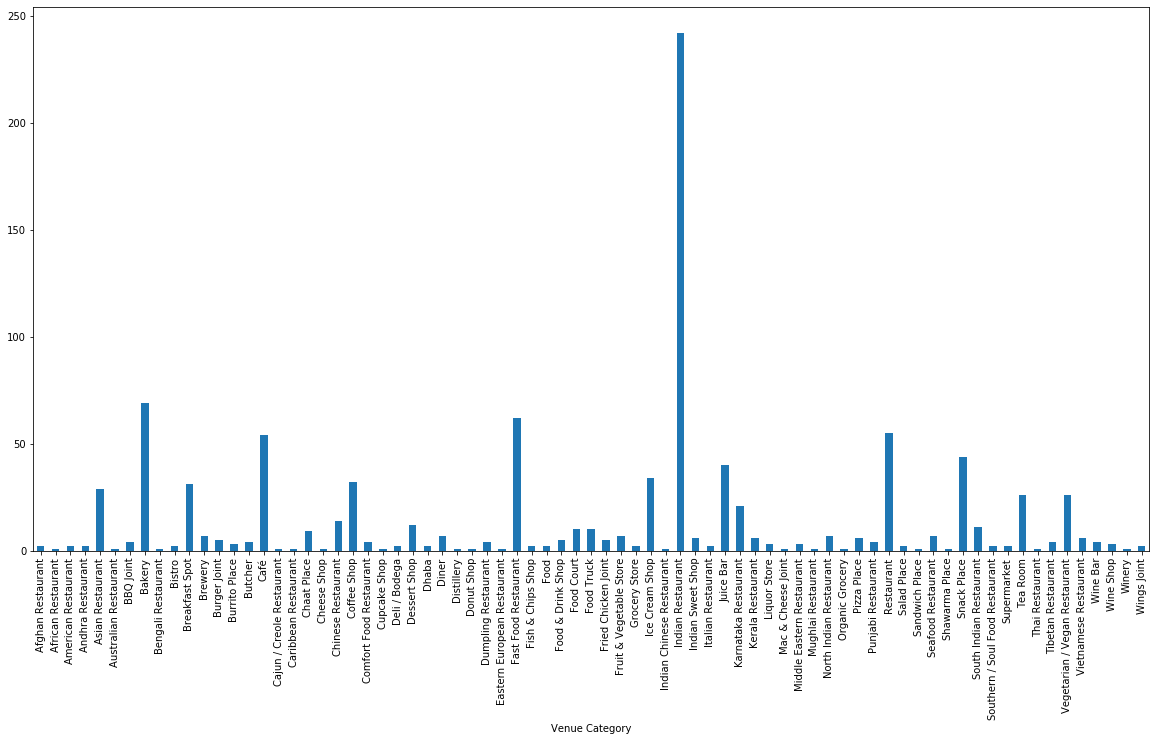

In [10]:
venuesFromFoursquareValidFood.groupby(["Venue Category"]).size().plot.bar(figsize=(20,10))

In [11]:
#Categories with occurence across all neighbourhoods

validCategories = venuesFromFoursquareValidFood.groupby(["Venue Category"]).size().reset_index(name='Counts')

In [12]:
TopValidCategories=validCategories.sort_values(by=['Counts'], ascending=False)[0:9]
TopValidCategories

,Venue Category,Counts
43,Indian Restaurant,242
7,Bakery,69
32,Fast Food Restaurant,62
57,Restaurant,55
15,Café,54
62,Snack Place,44
46,Juice Bar,40
41,Ice Cream Shop,34
21,Coffee Shop,32


In [13]:
#Filter Venues which belong to Top valid categories

filterList=TopValidCategories['Venue Category']
TopVenuesFromFoursquareValidFood=venuesFromFoursquareValidFood[venuesFromFoursquareValidFood['Venue Category'].isin(filterList)] 
print(TopVenuesFromFoursquareValidFood.shape)
TopVenuesFromFoursquareValidFood.head()

(632, 9)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Icon
2,571430,12.3857,77.0594,526b408311d296faa0e71efa,Hotel Utsav,12.385929,77.059058,Indian Restaurant,https://ss3.4sqi.net/img/categories_v2/food/in...
7,571430,12.3857,77.0594,50e8ebbde4b098a1ea5e2f32,Hotel New Sagar,12.385803,77.059914,Indian Restaurant,https://ss3.4sqi.net/img/categories_v2/food/in...
19,571430,12.3857,77.0594,516a1016e4b0d8dae0e35883,Hotel New shrungar,12.486972,77.035469,Indian Restaurant,https://ss3.4sqi.net/img/categories_v2/food/in...
24,571401,12.5402,76.9230,54e9f8ff498e93ca6e857df4,Guttal Pani Puri,12.528774,76.904663,Snack Place,https://ss3.4sqi.net/img/categories_v2/food/sn...
31,571401,12.5402,76.9230,4eb60813be7bfc284a96e11a,Baskin Robbins,12.540027,76.918652,Ice Cream Shop,https://ss3.4sqi.net/img/categories_v2/food/ic...


In [14]:
# drop venue icon column

TopVenuesFromFoursquareValidFood.drop(['Venue Icon'],axis=1, inplace=True)
TopVenuesFromFoursquareValidFood.shape

C:\Users\ASarkar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(632, 8)

In [15]:
# Create dummies for Venue Category along with Neighbourhood

TopVenuesFromFoursquareValidFood.head()
DFWithVenue = TopVenuesFromFoursquareValidFood[['Neighbourhood','Venue Category']]
TopVenuesFromFoursquareValidFood_withDummies = pd.get_dummies(DFWithVenue[['Venue Category']], prefix="", prefix_sep="")
TopVenuesFromFoursquareValidFood_withDummies.insert(0,"Neighbourhood",TopVenuesFromFoursquareValidFood[['Neighbourhood']])
TopVenuesFromFoursquareValidFood_withDummies.head()

,Neighbourhood,Bakery,Café,Coffee Shop,Fast Food Restaurant,Ice Cream Shop,Indian Restaurant,Juice Bar,Restaurant,Snack Place
2,571430,0,0,0,0,0,1,0,0,0
7,571430,0,0,0,0,0,1,0,0,0
19,571430,0,0,0,0,0,1,0,0,0
24,571401,0,0,0,0,0,0,0,0,1
31,571401,0,0,0,0,1,0,0,0,0


In [16]:
DFFeatures = TopVenuesFromFoursquareValidFood_withDummies.groupby('Neighbourhood').mean().reset_index()

In [17]:
DFFeatures.head()

,Neighbourhood,Bakery,Café,Coffee Shop,Fast Food Restaurant,Ice Cream Shop,Indian Restaurant,Juice Bar,Restaurant,Snack Place
0,570001,0.000000,0.000000,0.000000,0.066667,0.066667,0.466667,0.266667,0.000000,0.133333
1,570002,0.222222,0.222222,0.000000,0.000000,0.000000,0.333333,0.111111,0.000000,0.111111
2,570003,0.312500,0.125000,0.000000,0.125000,0.000000,0.312500,0.062500,0.062500,0.000000
3,570004,0.130435,0.043478,0.086957,0.130435,0.043478,0.173913,0.086957,0.000000,0.304348
4,570005,0.090909,0.000000,0.181818,0.090909,0.000000,0.090909,0.090909,0.272727,0.181818


##### Perform Clustering


In [18]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 6

DFFeatures_clean = DFFeatures.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(DFFeatures_clean)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([4, 5, 0, 3, 3, 3, 0, 3, 3, 4])

In [28]:
#DFFeatures.drop(['Cluster Labels'],axis=1, inplace=True)
DFFeatures.insert(0, 'Cluster Labels', kmeans.labels_)

In [29]:
DFFeatures.head(40)

,Cluster Labels,Neighbourhood,Bakery,Café,Coffee Shop,Fast Food Restaurant,Ice Cream Shop,Indian Restaurant,Juice Bar,Restaurant,Snack Place
0,4,570001,0.000000,0.000000,0.000000,0.066667,0.066667,0.466667,0.266667,0.000000,0.133333
1,5,570002,0.222222,0.222222,0.000000,0.000000,0.000000,0.333333,0.111111,0.000000,0.111111
2,0,570003,0.312500,0.125000,0.000000,0.125000,0.000000,0.312500,0.062500,0.062500,0.000000
3,3,570004,0.130435,0.043478,0.086957,0.130435,0.043478,0.173913,0.086957,0.000000,0.304348
4,3,570005,0.090909,0.000000,0.181818,0.090909,0.000000,0.090909,0.090909,0.272727,0.181818
5,3,570006,0.142857,0.000000,0.000000,0.000000,0.285714,0.285714,0.142857,0.142857,0.000000
6,0,570007,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000
7,3,570008,0.217391,0.130435,0.043478,0.130435,0.130435,0.043478,0.130435,0.086957,0.086957
8,3,570009,0.166667,0.055556,0.055556,0.055556,0.166667,0.166667,0.166667,0.111111,0.055556
9,4,570010,0.000000,0.000000,0.000000,0.250000,0.000000,0.500000,0.000000,0.000000,0.250000


In [30]:
# Add Latitude and Longitude for Neighbourhood
cleanPOandLL.rename(columns={'pincode': "Neighbourhood"},inplace=True)
cleanPOandLL.head()

,officename,Neighbourhood,longitude,latitude
59306,Malavalli S.O,571430,77.0594,12.3857
59316,Mandya H.O,571401,76.9230,12.5402
59575,Alanahalli S.O,570028,76.7048,12.3021
59591,Bannimantap S.O,570015,76.6538,12.3332
59596,Belavadi S.O,570018,76.5605,12.3510


In [31]:
# merge to add latitude/longitude for each neighborhood
DFFeatures_merged = DFFeatures.join(cleanPOandLL.set_index('Neighbourhood'), on='Neighbourhood')
DFFeatures_merged.drop(['officename'],axis=1, inplace=True)
DFFeatures_merged.head(10)

,Cluster Labels,Neighbourhood,Bakery,Café,Coffee Shop,Fast Food Restaurant,Ice Cream Shop,Indian Restaurant,Juice Bar,Restaurant,Snack Place,longitude,latitude
0,4,570001,0.000000,0.000000,0.000000,0.066667,0.066667,0.466667,0.266667,0.000000,0.133333,76.6532,12.3088
1,5,570002,0.222222,0.222222,0.000000,0.000000,0.000000,0.333333,0.111111,0.000000,0.111111,76.6318,12.3293
2,0,570003,0.312500,0.125000,0.000000,0.125000,0.000000,0.312500,0.062500,0.062500,0.000000,76.6508,12.3508
3,3,570004,0.130435,0.043478,0.086957,0.130435,0.043478,0.173913,0.086957,0.000000,0.304348,76.6476,12.2891
4,3,570005,0.090909,0.000000,0.181818,0.090909,0.000000,0.090909,0.090909,0.272727,0.181818,76.6397,12.3025
5,3,570006,0.142857,0.000000,0.000000,0.000000,0.285714,0.285714,0.142857,0.142857,0.000000,76.6180,12.3111
6,0,570007,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,76.6608,12.3302
7,3,570008,0.217391,0.130435,0.043478,0.130435,0.130435,0.043478,0.130435,0.086957,0.086957,76.6429,12.2832
8,3,570009,0.166667,0.055556,0.055556,0.055556,0.166667,0.166667,0.166667,0.111111,0.055556,76.6298,12.3036
9,4,570010,0.000000,0.000000,0.000000,0.250000,0.000000,0.500000,0.000000,0.000000,0.250000,76.6569,12.3032


In [32]:
temp = DFFeatures_merged.drop(['Neighbourhood'],axis=1)
temp.groupby(['Cluster Labels']).mean().reset_index()

,Cluster Labels,Bakery,Café,Coffee Shop,Fast Food Restaurant,Ice Cream Shop,Indian Restaurant,Juice Bar,Restaurant,Snack Place,longitude,latitude
0,0,0.270414,0.093094,0.023958,0.157918,0.011364,0.373073,0.023438,0.035377,0.011364,76.590375,12.322375
1,1,0.000000,0.018141,0.000000,0.011905,0.000000,0.962018,0.000000,0.007937,0.000000,76.690386,12.220343
2,2,0.048923,0.078420,0.085699,0.050142,0.052623,0.463623,0.029484,0.151289,0.039797,76.459517,12.273000
3,3,0.147104,0.080176,0.075892,0.162131,0.107593,0.174132,0.070235,0.075637,0.107098,76.678036,12.320309
4,4,0.000000,0.023237,0.023237,0.154808,0.023932,0.474056,0.195175,0.010417,0.095139,76.566533,12.297167
5,5,0.056645,0.289760,0.037582,0.000000,0.009804,0.475490,0.102397,0.000000,0.028322,76.412250,12.286267


## Creating the MAP


In [33]:
conda install folium -c conda-forge

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [34]:
import folium 
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
TOR_COORDINATES = (DFFeatures_merged['latitude'].mean(), DFFeatures_merged['longitude'].mean())

map_clusters = folium.Map(location=TOR_COORDINATES, zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]

colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
cluster_int = DFFeatures_merged['Cluster Labels'].apply(np.int64)

for lat, lon, poi, cluster in zip(DFFeatures_merged['latitude'], DFFeatures_merged['longitude'], DFFeatures_merged['Neighbourhood'], cluster_int):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters